<a href="https://colab.research.google.com/github/Ar-Anik/Machine_Learning/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

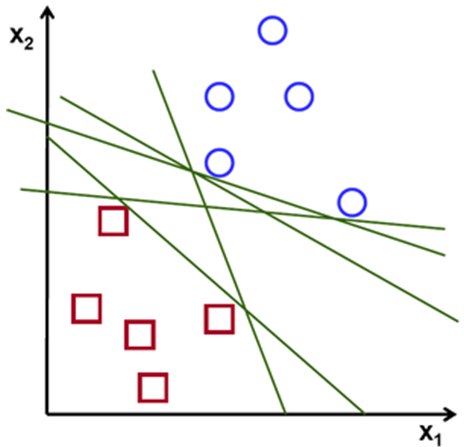

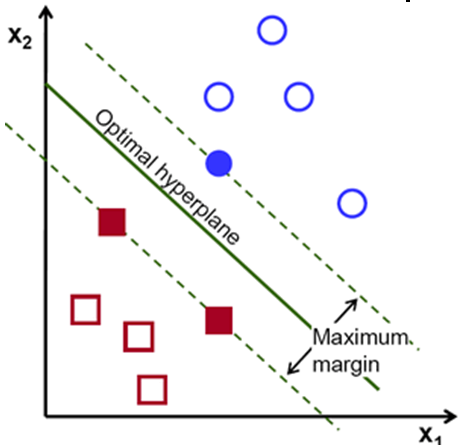

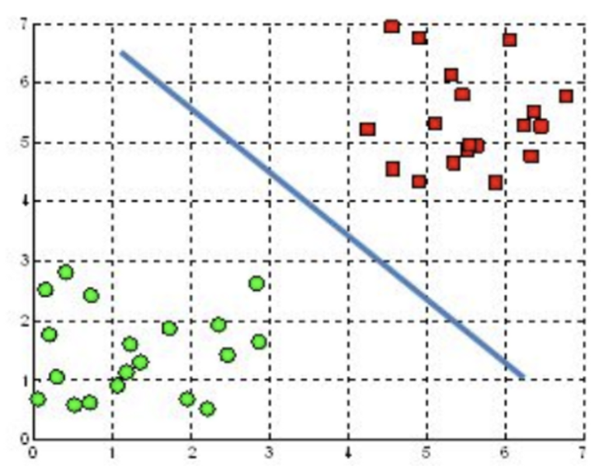

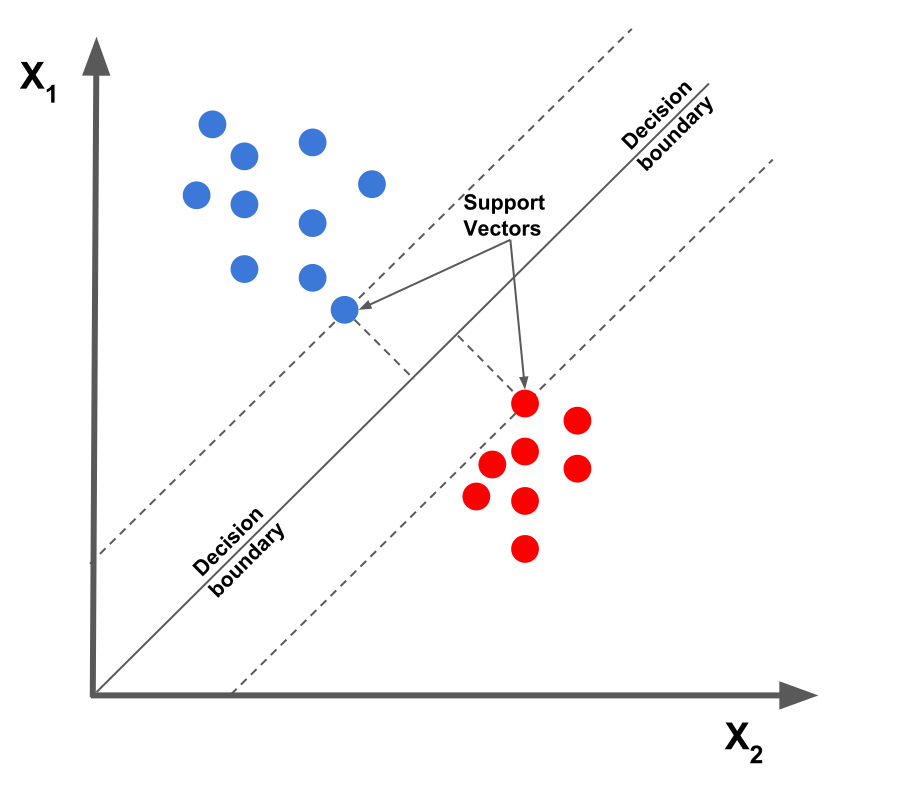

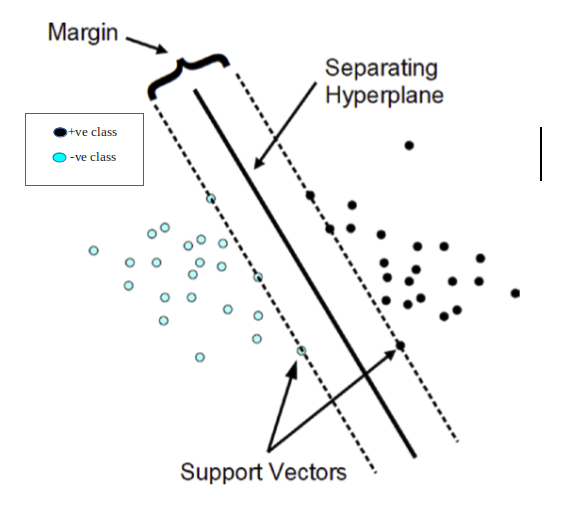

[Hyperplane Definition](https://data-science-er-hatekhori.quora.com/%E0%A6%AE%E0%A7%87%E0%A6%B6%E0%A6%BF%E0%A6%A8-%E0%A6%B2%E0%A6%BE%E0%A6%B0%E0%A7%8D%E0%A6%A8%E0%A6%BF%E0%A6%82%E0%A7%9F%E0%A7%87%E0%A6%B0-%E0%A6%B8%E0%A6%BE%E0%A6%A7%E0%A6%BE%E0%A6%B0%E0%A6%A3-%E0%A6%A7%E0%A6%BE%E0%A6%B0%E0%A6%A8%E0%A6%BE-%E0%A6%B8%E0%A6%BE%E0%A6%AA%E0%A7%8B%E0%A6%B0%E0%A7%8D%E0%A6%9F-%E0%A6%AD%E0%A7%87%E0%A6%95%E0%A7%8D%E0%A6%9F%E0%A6%B0-%E0%A6%AE%E0%A7%87%E0%A6%B6%E0%A6%BF%E0%A6%A8-%E0%A6%AA%E0%A6%B0%E0%A7%8D%E0%A6%AC-%E0%A7%A9-%E0%A7%A7)


[SVM in English](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200)

[SVM in Bangla](https://datasinsightsbd.gitbook.io/dsbook/supervised-ml/svm)


Gamma decides that how much curvature we want in a decision boundary.


The regularization parameter (lambda) serves as a degree of importance that is given to miss-classifications.


SVC = Support Vector Classifier <br>
SVM = Support Vector Machine

In [ ]:
import pandas
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
iris.feature_names

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data = pandas.DataFrame(iris.data, columns=iris.feature_names)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data['target'] = iris.target

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data[data.target == 1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [ ]:
ddata[data.target == 0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
data[data.target == 2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [20]:
data['flower_name'] = data.target.apply(lambda x : iris.target_names[x])

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [22]:
# plot 

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df0 = data[data.target == 0]
df1 = data[data.target == 1]
df2 = data[data.target == 2]

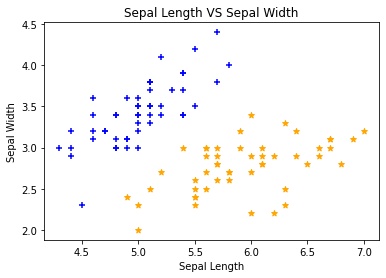

In [33]:
# plot sepal length VS sepal width

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length VS Sepal Width')

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='orange', marker='*')

plt.show()

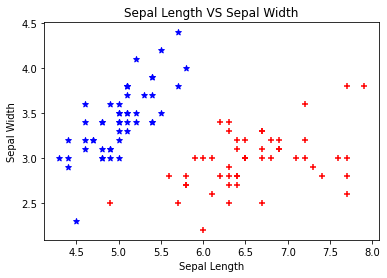

In [32]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length VS Sepal Width')

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue', marker='*')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='+')

plt.show()

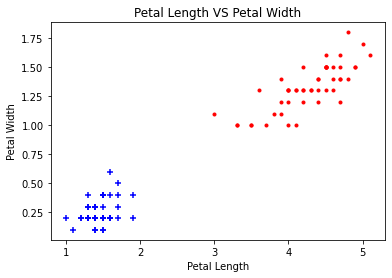

In [30]:
# plot petal length VS petal width

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length VS Petal Width')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='blue', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', marker='.')

plt.show()

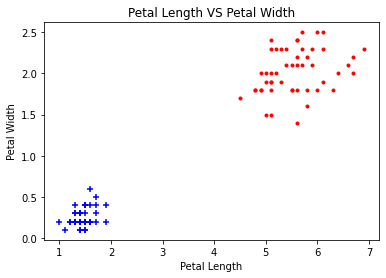

In [34]:
# plot petal length VS petal width

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length VS Petal Width')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='blue', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', marker='.')

plt.show()

In [35]:
# Split Data

from sklearn.model_selection import train_test_split

In [36]:
x = data.drop(['target', 'flower_name'], axis='columns')

x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y = data.target

y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [72]:
len(x_train)

120

In [73]:
len(x_test)

30

In [74]:
len(y_train)

120

In [75]:
len(y_test)

30

In [96]:
# SVM model Create

from sklearn.svm import SVC

model = SVC()

In [97]:
# Train SVM model

model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
# predict value

model.predict([[5.1, 6.2, 5.2, 19]])

array([2])

In [78]:
# accuracy calculate

model.score(x_test, y_test)

0.9666666666666667

In [87]:
# Regularization ∝ (1/score)

model = SVC(C=7.0)
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.9333333333333333

In [88]:
# Gamma ∝ (1/score)

model = SVC(gamma=100)
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.36666666666666664

In [89]:
model = SVC(gamma=500)
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.2

In [91]:
# kernel value are 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

model = SVC(kernel='linear')
model.fit(x_train, y_train)

model.score(x_test, y_test)

1.0

In [92]:
model = SVC(kernel='poly')
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.9

In [93]:
model = SVC(kernel='sigmoid')
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.2

In [94]:
model = SVC(kernel='precomputed')
model.fit(x_train, y_train)

model.score(x_test, y_test)

ValueError: ignored